In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bike_df = pd.read_csv('BIKE DETAILS.csv')
car_df = pd.read_csv('Car Sale.csv')
amazon_df = pd.read_csv('amazon.csv')
spotify_df = pd.read_csv('spotify.csv')


#EDA - 1


In [161]:
# What is the range of selling prices in the dataset
bike_df['selling_price'].min(), bike_df['selling_price'].max()

(np.int64(5000), np.int64(760000))

In [162]:
# What is the median selling price for bikes in the dataset
bike_df['selling_price'].median()

np.float64(45000.0)

In [163]:
# What is the most common seller type
bike_df['seller_type'].mode()[0]

'Individual'

In [164]:
# How many bikes have driven more than 50,000 kilometers
bike_df[bike_df['km_driven'] > 50000].shape[0]

170

In [165]:
# What is the average km_driven value for each ownership type
bike_df.groupby('owner')['km_driven'].mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [166]:
# What proportion of bikes are from the year 2015 or older
bike_df[bike_df['year'] <= 2015].shape[0] / bike_df.shape[0]

0.5664467483506126

In [167]:
# What is the trend of missing values across the dataset
bike_df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [168]:
# What is the highest ex_showroom_price recorded, and for which bike
bike_df.loc[bike_df['ex_showroom_price'].idxmax(), ['name', 'ex_showroom_price']]

name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object

In [169]:
# What is the total number of bikes listed by each seller type
bike_df['seller_type'].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

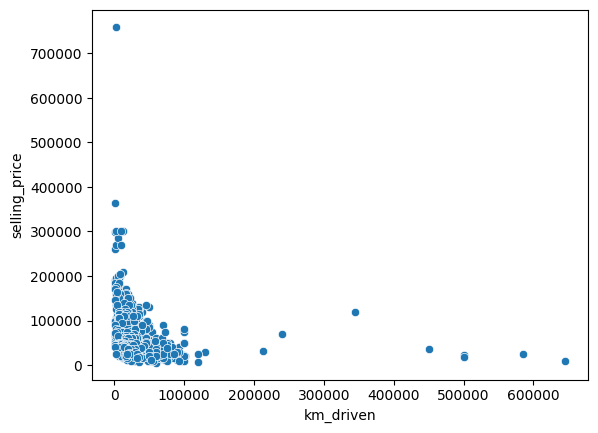

In [170]:
# What is the relationship between selling_price and km_driven for first-owner bikes
sns.scatterplot(data=bike_df[bike_df['owner'] == '1st owner'], x='km_driven', y='selling_price')
plt.show()

In [171]:
# Identify and remove outliers in the km_driven column using the IQR method
Q1 = bike_df['km_driven'].quantile(0.25)
Q3 = bike_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
bike_df_no_outliers = bike_df[~((bike_df['km_driven'] < (Q1 - 1.5 * IQR)) | (bike_df['km_driven'] > (Q3 + 1.5 * IQR)))]

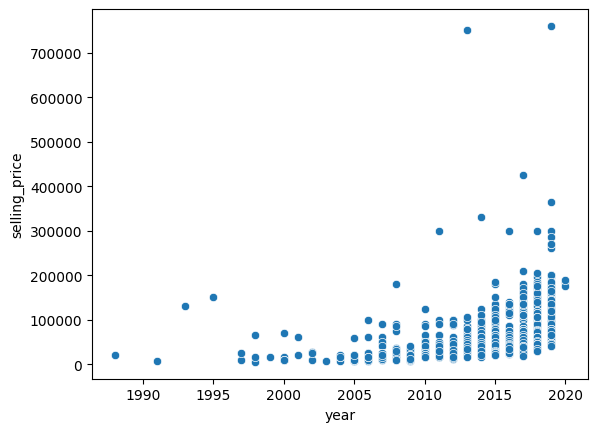

In [172]:
# Perform a bivariate analysis to visualize the relationship between year and selling_price
sns.scatterplot(data=bike_df, x='year', y='selling_price')
plt.show()

In [173]:
# What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
current_year = 2025
bike_df['depreciation'] = bike_df['ex_showroom_price'] - bike_df['selling_price']
bike_df['age'] = current_year - bike_df['year']
bike_df['depreciation_per_year'] = bike_df['depreciation'] / bike_df['age']
bike_df.groupby('year')['depreciation_per_year'].mean()

year
1988            NaN
1991            NaN
1993            NaN
1995            NaN
1997            NaN
1998            NaN
1999            NaN
2000            NaN
2001    1452.166667
2002            NaN
2003            NaN
2004    1754.857143
2005    2242.600000
2006    2087.605263
2007    2355.500000
2008    3219.554622
2009    2389.236607
2010    3043.928571
2011    3364.476190
2012    2870.588358
2013    3590.573899
2014    3136.873278
2015    2801.327500
2016    3147.576720
2017    2788.260294
2018    1860.456401
2019     492.427083
2020   -6852.000000
Name: depreciation_per_year, dtype: float64

In [174]:
# Which bike names are priced significantly above the average price for their manufacturing year
avg_price_by_year = bike_df.groupby('year')['selling_price'].transform('mean')
bike_df[bike_df['selling_price'] > avg_price_by_year]['name'].unique()

array(['Royal Enfield Classic 350', 'Royal Enfield Classic Gunmetal Grey',
       'Yamaha Fazer FI V 2.0 [2016-2018]',
       'Royal Enfield Bullet 350 [2007-2011]', 'Yamaha YZF R3', 'Jawa 42',
       'Hero Honda Glamour', 'Yamaha YZF R15 S', 'Yamaha FZ25',
       'Jawa Standard', 'Royal Enfield Thunderbird 350', 'Honda CBR-250R',
       'Bajaj Dominar 400', 'KTM 390 Duke', 'Yamaha FZ16',
       'Royal Enfield Electra 5 S', 'Hero Honda Passion Plus',
       'Royal Enfield Bullet 350', 'Bajaj Pulsar 150 [2001-2011]',
       'Hero Xtreme Sports', 'Honda CB Hornet 160R',
       'Royal Enfield Electra 4 S', 'Mahindra Mojo XT300',
       'Bajaj Pulsar AS200', 'Royal Enfield Thunderbird 350X',
       'Suzuki Intruder 150', 'Hero Honda Karizma ZMR [2010]',
       'Honda CB Unicorn 150', 'Hero Honda CD Deluxe',
       'Royal Enfield Classic Desert Storm', 'TVS Apache RTR 200 4V',
       'UM Renegade Commando', 'Royal Enfield Continental GT 650',
       'Honda Activa 3G', 'Harley-Davidson Stree

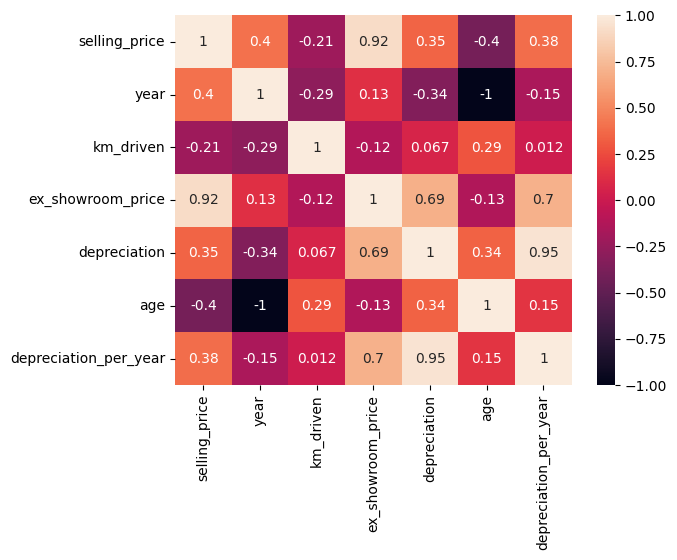

In [175]:
# Develop a correlation matrix for numeric columns and visualize it using a heatmap.
corr = bike_df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True)
plt.show()

#EDA - 2

In [176]:
# What is the average selling price of cars for each dealer, and how does it compare across different dealers
car_df.groupby('Dealer_Name')['Price ($)'].mean()

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

In [177]:
# Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends
car_df.groupby('Company')['Price ($)'].std().idxmax()

'Lincoln'

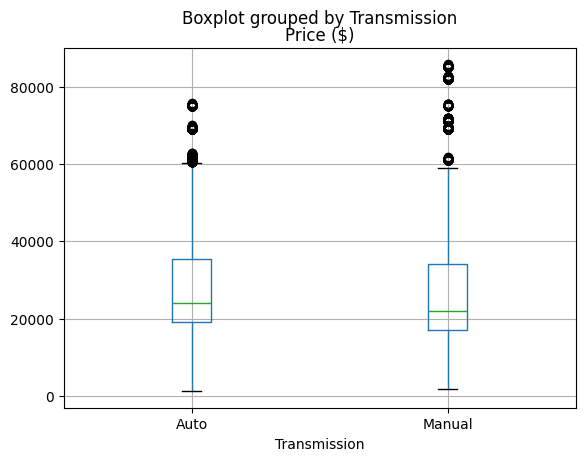

In [178]:
# What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
car_df.boxplot(column='Price ($)', by='Transmission')
plt.show()

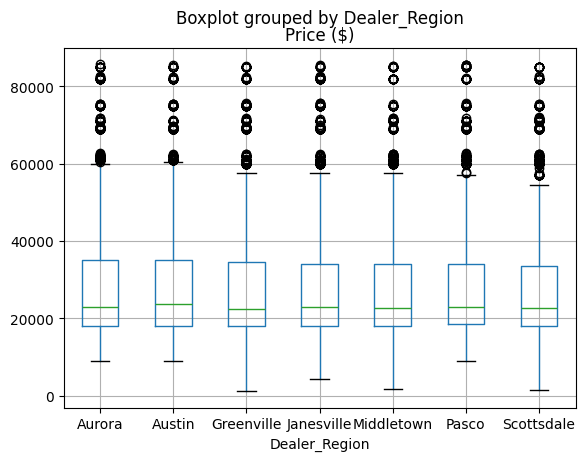

In [179]:
# What is the distribution of car prices across different regions
car_df.boxplot(column='Price ($)', by='Dealer_Region')
plt.show()

In [180]:
# What is the distribution of cars based on body styles
car_df['Body Style'].value_counts()

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64

In [181]:
# How does the average selling price of cars vary by customer gender and annual income
car_df.groupby(['Gender', pd.cut(car_df['Annual Income'], bins=3)])['Price ($)'].mean()

C:\Users\a777h\AppData\Local\Temp\ipykernel_5452\118426088.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  car_df.groupby(['Gender', pd.cut(car_df['Annual Income'], bins=3)])['Price ($)'].mean()


Gender  Annual Income             
Female  (-1109.92, 3740053.333]       28251.648995
        (3740053.333, 7470026.667]    32100.117647
        (7470026.667, 11200000.0]              NaN
Male    (-1109.92, 3740053.333]       28037.576639
        (3740053.333, 7470026.667]    27902.938144
        (7470026.667, 11200000.0]     44000.333333
Name: Price ($), dtype: float64

In [182]:
# What is the distribution of car prices by region, and how does the number of cars sold vary by region
car_df.groupby('Dealer_Region')['Price ($)'].agg(['mean', 'count'])

,mean,count
Dealer_Region,,
Aurora,28334.626837,3130
Austin,28341.603628,4135
Greenville,28180.819054,3128
Janesville,27833.350955,3821
Middletown,27856.338875,3128
Pasco,28119.039923,3131
Scottsdale,27954.958928,3433


In [183]:
# How does the average car price differ between cars with different engine sizes
car_df.groupby('Engine')['Price ($)'].mean()

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64

In [184]:
# How do car prices vary based on the customer’s annual income bracket
car_df.groupby(pd.cut(car_df['Annual Income'], bins=4))['Price ($)'].agg(['mean', 'count'])

C:\Users\a777h\AppData\Local\Temp\ipykernel_5452\4112095959.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  car_df.groupby(pd.cut(car_df['Annual Income'], bins=4))['Price ($)'].agg(['mean', 'count'])


,mean,count
Annual Income,,
"(-1109.92, 2807560.0]",28051.495017,23478
"(2807560.0, 5605040.0]",30229.271845,412
"(5605040.0, 8402520.0]",30133.600000,15
"(8402520.0, 11200000.0]",26001.000000,1


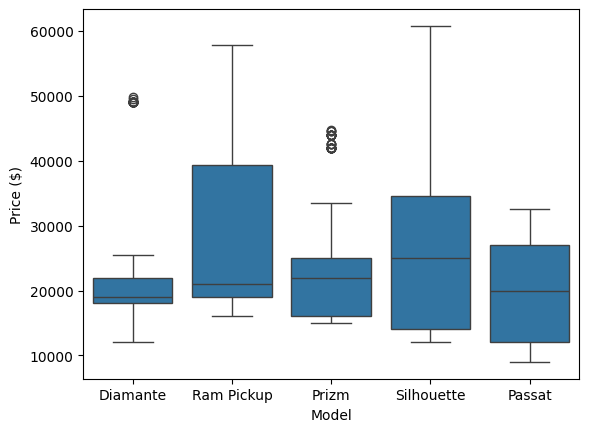

In [185]:
# What are the top 5 car models with the highest number of sales, and how does their price distribution look
top5_models = car_df['Model'].value_counts().nlargest(5).index
sns.boxplot(data=car_df[car_df['Model'].isin(top5_models)], x='Model', y='Price ($)')
plt.show()

In [186]:
# How does car price vary with engine size across different car colors, and which colors have the highest price variation
car_df.groupby('Color')['Price ($)'].std().nlargest(5)

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64

In [187]:
# Is there any seasonal trend in car sales based on the date of sale
car_df['Date'] = pd.to_datetime(car_df['Date'])
car_df['Month'] = car_df['Date'].dt.month
car_df.groupby('Month')['Price ($)'].count()

Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: Price ($), dtype: int64

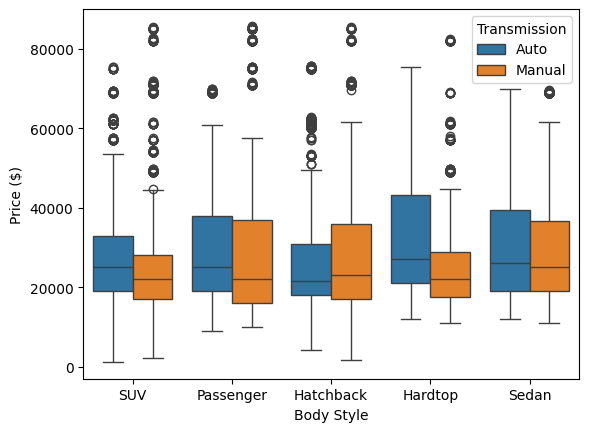

In [188]:
# How does the car price distribution change when considering different combinations of body style and transmission type
sns.boxplot(data=car_df, x='Body Style', y='Price ($)', hue='Transmission')
plt.show()

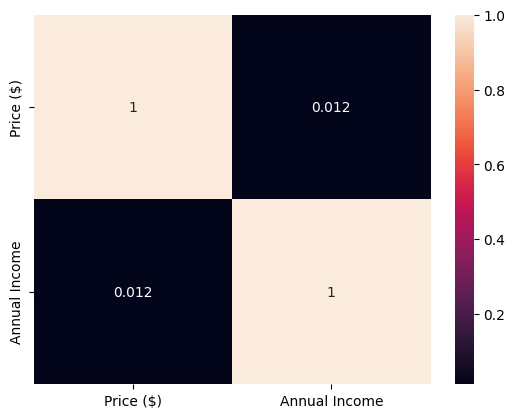

In [189]:
# What is the correlation between car price, engine size, and annual income of customers, and how do these features interact
corr = car_df[['Price ($)', 'Annual Income']].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [190]:
# How does the average car price vary across different car models and engine types?
car_df.groupby(['Model', 'Engine'])['Price ($)'].mean()

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64

#EDA - 3

In [191]:
# What is the average rating for each product category
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')
amazon_df.groupby('category')['rating'].mean()



category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [192]:
# What are the top rating_count products by category
amazon_df.sort_values('rating_count', ascending=False).groupby('category').head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,NaN,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...
750,B00ZRBWPA0,Eveready Red 1012 AAA Batteries - Pack of 10,Electronics|GeneralPurposeBatteries&BatteryCha...,₹159,₹180,12%,4.3,989,Think Battery - Think Eveready - Eveready Red ...,"AGY65IJP7XREWO3GUDT46474CYKA,AGU43SQ6PXZIL5F5R...","Amazon Customer,Cijo George,Mallikarjuna Ukkad...","R1VCGAPSS4LWYQ,R3DS8EL4VV5LS6,R28MH1Y6O92EOP,R...","Nice .,very good batteries received,Longtevity...","Nive,very good batteries received,Like,Good pr...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eveready-Alkaline-Batter...
977,B083T5G5PM,Sennheiser CX 80S in-Ear Wired Headphones with...,"Electronics|Headphones,Earbuds&Accessories|Hea...","₹1,490","₹1,990",25%,4.1,"98,250",Uncompressed and balanced Sennheiser sound for...,"AF7IXQKBUL6NEIQG4R53LMJJUGXQ,AHB43CZ4RHLJ5S6CB...","Neeraj Vishwakarma,Sameer Patil","R69FUCBNGBRX1,R8VZ569JVM3CS",A Quality Sound-Signature but leaves craving f...,For those looking for a genuine review & a bri...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sennheiser-CX-80s-Ear-Ea...
1059,B09Y5FZK9N,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹809,"₹1,545",48%,3.7,976,Classic Design: The classical mirror polish of...,"AHFT3PEI64SYXMAXBJMISWFPD72A,AHK7QIHRRUR4GRXTS...","Amresh Tiwari,Amazon Customer,Sarvagya Verma,S...","RBEG7QZLRCJDN,R28QMPIJNBM5OK,R14J3NXQ5NAC7R,RK...","Kettle is good but bottle is not good quality,...","Bottle quality is not good.,Best for hot water...",https://m.media-amazon.com/images/I/41HqmhflMW...,https://www.amazon.in/Pigeon-Stainless-boiling...
151,B08QSDKFGQ,Zoul USB Type C Fast Charging 3A Nylon Braided...,Computers&Accessories|Accessories&Peripherals|...,₹339,"₹1,099",69%,4.3,974,{3A/QC 3.0 FAST CHARGING and DATA SYNC} : This...,"AHMKXORT3VNMB75C3EUBYMFYELFQ,AEKJRELVNMICYPOYT...","Pratyush Pahuja,Thiyagarajan,yeses,Amazon Cust...","R2S0AYWUV349HP,R35OW9CYQNAYHY,R3B3DDF1D5NULK,R...","Great Cable, Charging Speeds Could Be Better,G...",Not charging as fast as I'd have expected. May...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Charging-Braided-Charger...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,B07JB2Y4SR,Classmate Octane Colour Burst-Multicolour Gel ...,Home&Kitchen|CraftMaterials|DrawingMaterials|D...,₹90,₹100,10%,4.4,"10,718",10 Rich colours with silver and gold options|C...,"AFZD4RCAOTL4JRRKT6WHVVJWDNHA,AECAPFEPRBCKU4VOB...","Vijaya,Kumkum Kumari,Amazon Customer,Altaf Kha...","R1NXQAUJ3LO3OW,R1MWEBTA35BES8,R2OTG33BME1DP2,R...","Very good,WORTH TO BUY.,Writes neat but smells...","Nice combination for color sketches,It glides ...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Classmate-ITC-Octane-Col...
941,B07P434WJY,"RC PRINT GI 790 Ink Refill for Canon G1000, G1...","Computers&Accessories|Printers,Inks&Accessorie...",₹549,"₹1,999",73%,4.3,"1,367",Inks designed specially for use with your prin...,"AGWXUDJLYBQYBI5O7UHDK6QW7FYA,AHYBJJUUPQJTFXXO5...","madhu AR,Pawan,Mohamed Ajmal T M,POGU SAIKUMAR...","R2LRRBAFN6I6AZ,R1FBE05UZD56IF,R1IRK5NMYFJN5T,R...","Value for money,Ink,Great,Best in the Market,V...",+ Good product+ Cheap and best for alternative...,https://m

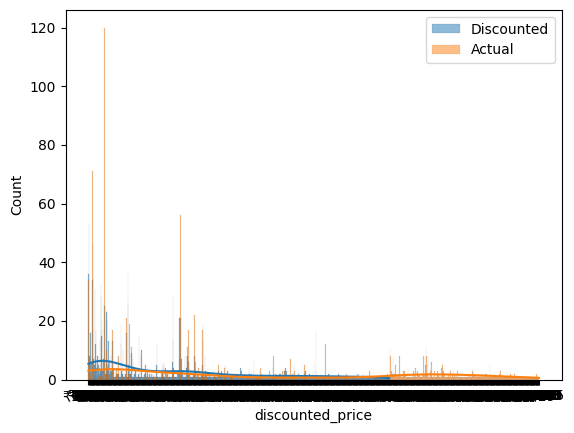

In [193]:
# What is the distribution of discounted prices vs. actual prices
sns.histplot(amazon_df['discounted_price'], label='Discounted', kde=True)
sns.histplot(amazon_df['actual_price'], label='Actual', kde=True)
plt.legend()
plt.show()

In [194]:
# How does the average discount percentage vary across categories
amazon_df['discount_percentage'] = pd.to_numeric(amazon_df['category'], errors='coerce')
amazon_df.groupby('category')['discount_percentage'].mean()


category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPen

In [195]:
# What are the most popular product names
amazon_df['product_name'].value_counts().head(5)

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                 5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                          4
Flix Micro Usb Cable For Smartphone (Black)                                                                                                                               3
boAt Micro USB 55 Tangle-free, Sturdy Micro USB Cable with 3A Fast Charging & 480mbps Data Transmission (Black)                                                           3
Portronics Konnect CL 20W POR-1067 Type-C to 8 Pin USB 1.2M Cable with Power Delivery & 3A Quick Charge Support, Nylon Braided for All Type-C and 8 Pin Devices, Green    3
Name: count, dtype: int64

In [196]:
# What are the most popular product keywords
# This requires text processing; simple approach: split product names and count
from collections import Counter
keywords = Counter(" ".join(amazon_df['product_name']).split())
keywords.most_common(5)

[('with', 718), ('for', 614), ('|', 457), ('&', 432), ('USB', 342)]

In [197]:
# What are the most popular product reviews
amazon_df['review_title'].value_counts().head(5)

review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                        10
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good     8
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                        8
A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit                    

In [198]:
# What is the correlation between discounted_price and rating
# First, convert everything to string to use .str functions
amazon_df['discounted_price'] = amazon_df['discounted_price'].astype(str)


amazon_df['discounted_price'] = amazon_df['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)


amazon_df['discounted_price'] = pd.to_numeric(amazon_df['discounted_price'], errors='coerce')


amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')


amazon_df[['discounted_price', 'rating']].corr()


,discounted_price,rating
discounted_price,1.000000,0.120337
rating,0.120337,1.000000


In [199]:
# What are the Top 5 categories based on the highest ratings
amazon_df.groupby('category')['rating'].mean().nlargest(5)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64

In [200]:
# Identify any potential areas for improvement or optimization based on the data analysis.
# Review the summary statistics
amazon_df.describe(include='all')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465.000000,1465,0.0,1464.000000,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,NaN,449,NaN,NaN,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B08WRWPM22,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,NaN,₹999,NaN,NaN,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,NaN,120,NaN,NaN,9,6,10,10,10,10,8,3,1
mean,NaN,NaN,NaN,3125.310874,NaN,NaN,4.096585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,6944.304394,NaN,NaN,0.291674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,39.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,325.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,799.000000,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1999.000000,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#EDA - 4

In [201]:
# Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
spotify_df.dropna(inplace=True)
spotify_df.drop_duplicates(inplace=True)
spotify_df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


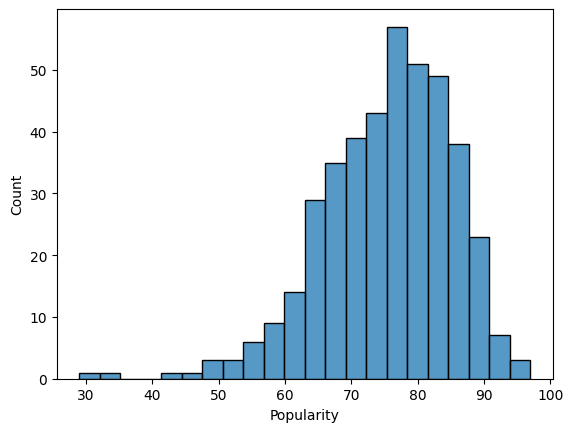

In [202]:
# What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
sns.histplot(spotify_df['Popularity'])
plt.show()

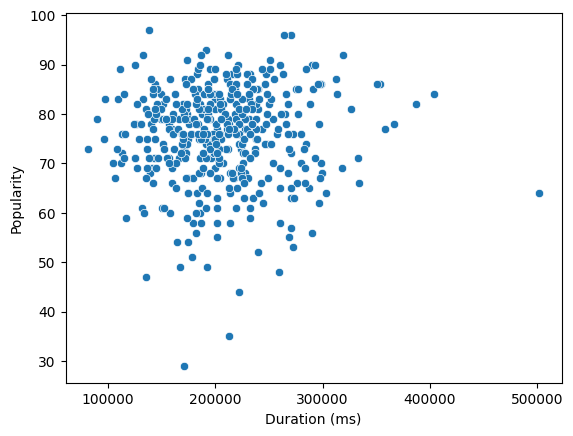

In [203]:
# Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
sns.scatterplot(data=spotify_df, x='Duration (ms)', y='Popularity')
plt.show()

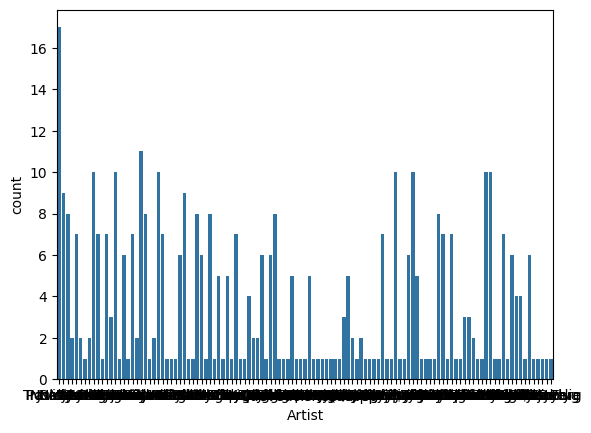

In [204]:
# Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
sns.countplot(data=spotify_df, x='Artist')
plt.show()

In [205]:
# What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
spotify_df.nsmallest(5, 'Popularity')[['Artist', 'Track Name']]

,Artist,Track Name
207,Pressa,Attachments (feat. Coi Leray)
231,Justin Bieber,Intentions
413,French Montana,Splash Brothers
225,Lil Baby,On Me - Remix
407,Wyclef Jean,911 (feat. Mary J. Blige)


In [206]:
# Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
top5_artists = spotify_df['Artist'].value_counts().nlargest(5).index
spotify_df[spotify_df['Artist'].isin(top5_artists)].groupby('Artist')['Popularity'].mean()

Artist
21 Savage    83.800000
Drake        82.882353
Eminem       83.636364
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64

In [207]:
# For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
popular_tracks = spotify_df.loc[spotify_df.groupby('Artist')['Popularity'].idxmax()]
popular_tracks[popular_tracks['Artist'].isin(top5_artists)][['Artist', 'Track Name']]

,Artist,Track Name
70,21 Savage,redrum
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA)
80,Eminem,Without Me
100,JAY-Z,Ni**as In Paris
312,Lil Nas X,THATS WHAT I WANT


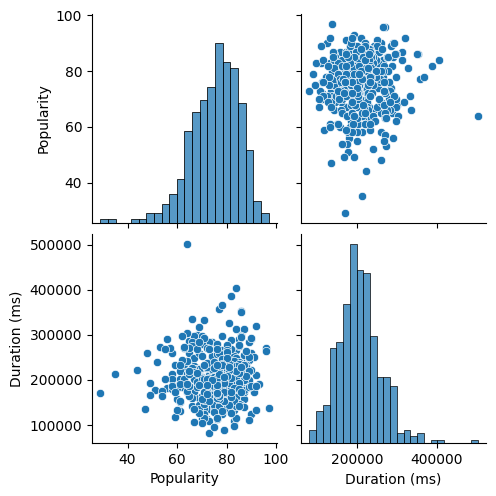

In [208]:
# Visualize relationships between multiple numerical variables simultaneously using a pair plot
sns.pairplot(spotify_df[['Popularity', 'Duration (ms)']])
plt.show()

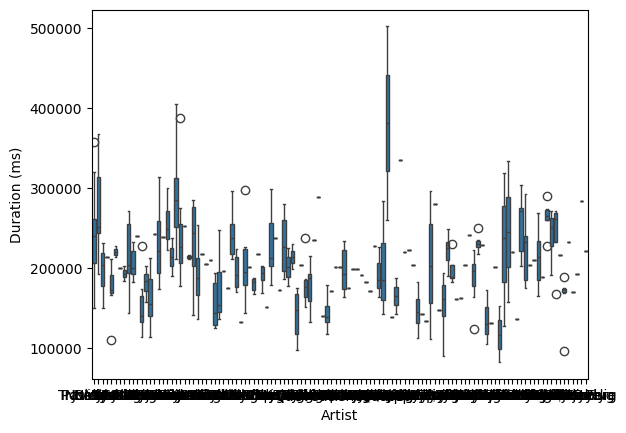

In [209]:
# Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
sns.boxplot(data=spotify_df, x='Artist', y='Duration (ms)')
plt.show()

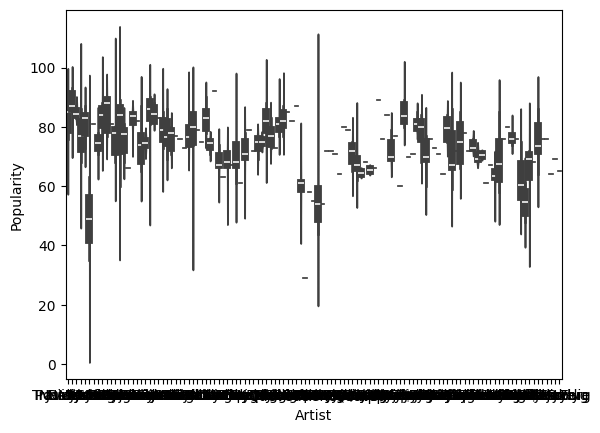

In [210]:
# How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot
sns.violinplot(data=spotify_df, x='Artist', y='Popularity')
plt.show()